In [1]:
## import libreries
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import pandas as pd 
import sys

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Dadaset

In [3]:
#Lead NNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(images , targets) , (_,_) = fashion_mnist.load_data()

In [4]:
# Get only a subpart of the dataset 
images = images[:10000]
targets = targets[:10000]


print("- Image shape:",images.shape)
print("- Targets shape:",targets.shape)

- Image shape: (10000, 28, 28)
- Targets shape: (10000,)


### Plot one of the data 

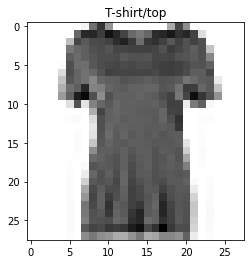

In [5]:
targets_names =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#plot image 
plt.imshow(images[10],cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

In [6]:
print("First line of the image",images[11][0])
print("Associated target",targets[11])

First line of the image [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 111  93  85
  27   0   0   0   0   0   1   0   0   0]
Associated target 9


## Create model 

In [7]:
#For the model , we will create .

- Input layer : will be the selected images[11]
- First , a hidden layer with 256 neurones 
- Then , a second hiden layer wiht 128 neurones
- The outpout ( multivariate output )

NB:  Evry single neural rapresent a class

### Flatten the image 

In [8]:
#Create the model 
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Flatten(input_shape=[28,28])) # Flatten image ( applatir l'image)


print("Shape of the image",images[0:1].shape)
model_output = model.predict(images[0:1])
print("Shape of the image after the Flattend:",model_output.shape)

Shape of the image (1, 28, 28)
1/1 [==============================] - 0s 244ms/step
Shape of the image after the Flattend: (1, 784)


### Add the layers

In [9]:
#Flatten

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))


# Add the layers
model.add(tf.keras.layers.Dense(256,activation="relu"))  #Hidden layer 1
model.add(tf.keras.layers.Dense(128,activation="relu"))  # Hidden layer 2
model.add(tf.keras.layers.Dense(10,activation='softmax')) #The output neurons (10 neurons, whose representations are 10 classes), the sum of each output neuron has a value equal to 1. And they are all normally distributed (a normal distribution).


#model output

model_output = model.predict(images[0:1])
print((model_output), targets[0:1])

1/1 [==============================] - 0s 137ms/step
[[4.9520587e-15 0.0000000e+00 0.0000000e+00 9.9997282e-01 0.0000000e+00
  2.7219417e-05 7.3307272e-26 0.0000000e+00 7.4188499e-30 0.0000000e+00]] [9]


### Model Summary

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model 

In [11]:
#compile the model 

model.compile(
    loss="sparse_categorical_crossentropy",    # Loss funtion
    optimizer="sgd",           #stocastic gradian decend 
    metrics=["accuracy"]
)

## Train the model

In [12]:
history = model.fit(images, targets,epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 57872700.0000 - accuracy: 0.1005
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1012
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3025 - accuracy: 0.0982
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1021
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.0983
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1021
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.0982
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1006
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy: 0.1020
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy:

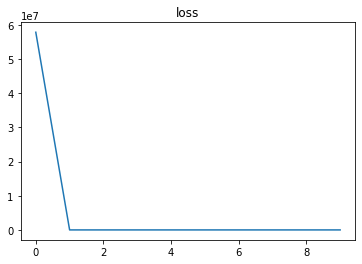

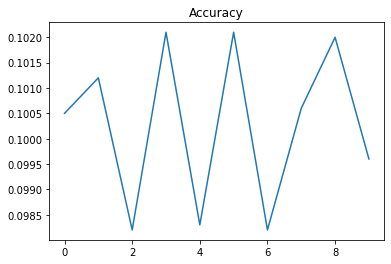

In [13]:
loss_cuve = history.history["loss"]
acc_curve = history.history["accuracy"]


plt.plot(loss_cuve)
plt.title("loss")
plt.show()


plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()